In [1]:
%load_ext autoreload
%autoreload 2

import os
import src.starter.utils as starter
import src.starter.visualize as vis
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm_notebook, tqdm
import numpy as np
import matplotlib as mpl
from src.vis_utils import show_slices, multi_slice_viewer
tqdm.pandas()

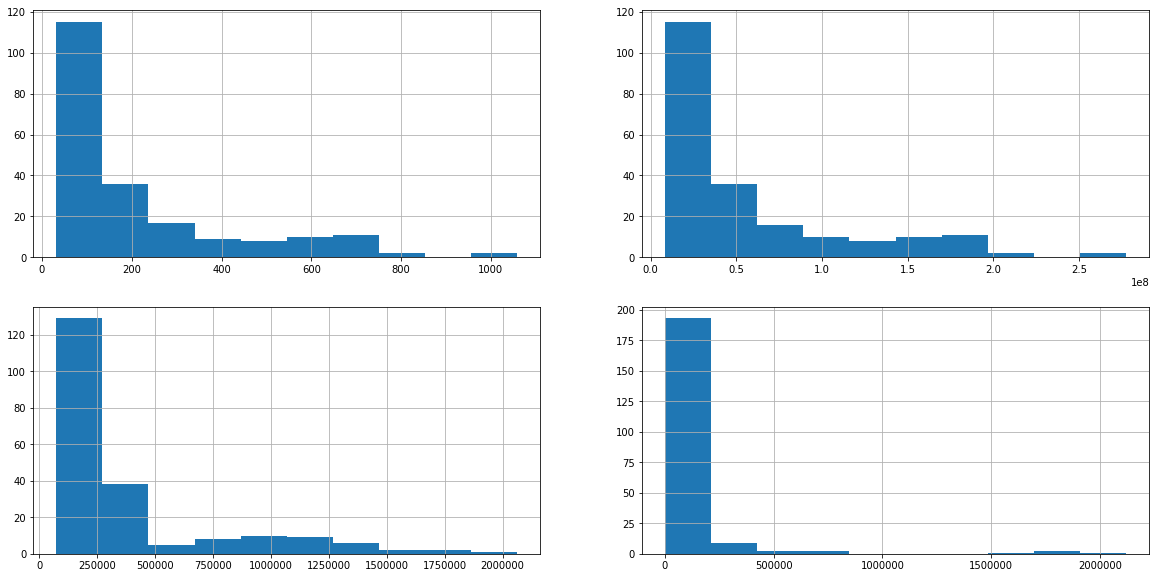

,captured_pixel_width,captured_slice_thickness,case_id,case_nid,num_slices,height,width,im_volume,kidney_volume,tumor_volume,max_val,min_val
0,0.919922,1.0,case_00000,0,611.0,512.0,512.0,160169984.0,901262.0,18231.0,1413.0,-1024.0
1,0.798828,1.0,case_00001,1,602.0,512.0,512.0,157810688.0,1424126.0,21965.0,1393.0,-1024.0
2,0.939453,2.0,case_00002,2,261.0,512.0,512.0,68419584.0,606988.0,39224.0,3071.0,-1024.0
3,0.855469,2.0,case_00003,3,270.0,512.0,512.0,70778880.0,531769.0,13926.0,3071.0,-1024.0
4,0.976562,4.0,case_00004,4,64.0,512.0,512.0,16777216.0,113183.0,4932.0,2125.0,-1024.0


In [2]:
mpl.rcParams['figure.figsize'] = (20,10)
data = pd.read_csv("data_stats.csv")
plt.subplot(2,2,1)
data.num_slices.hist()
plt.subplot(2,2,2)
data.im_volume.hist()
plt.subplot(2,2,3)
data.kidney_volume.hist()
plt.subplot(2,2,4)
data.tumor_volume.hist()
plt.show()
data.head()

In [3]:
def find_first_kidney_slice(mask):
    mask_data = mask.get_data()
    return np.where(mask_data.sum(axis=(1,2))>0)[0][0]

Case 8 kidney size: 242822.0 tumor size: 298753.0


<IPython.core.display.Javascript object>


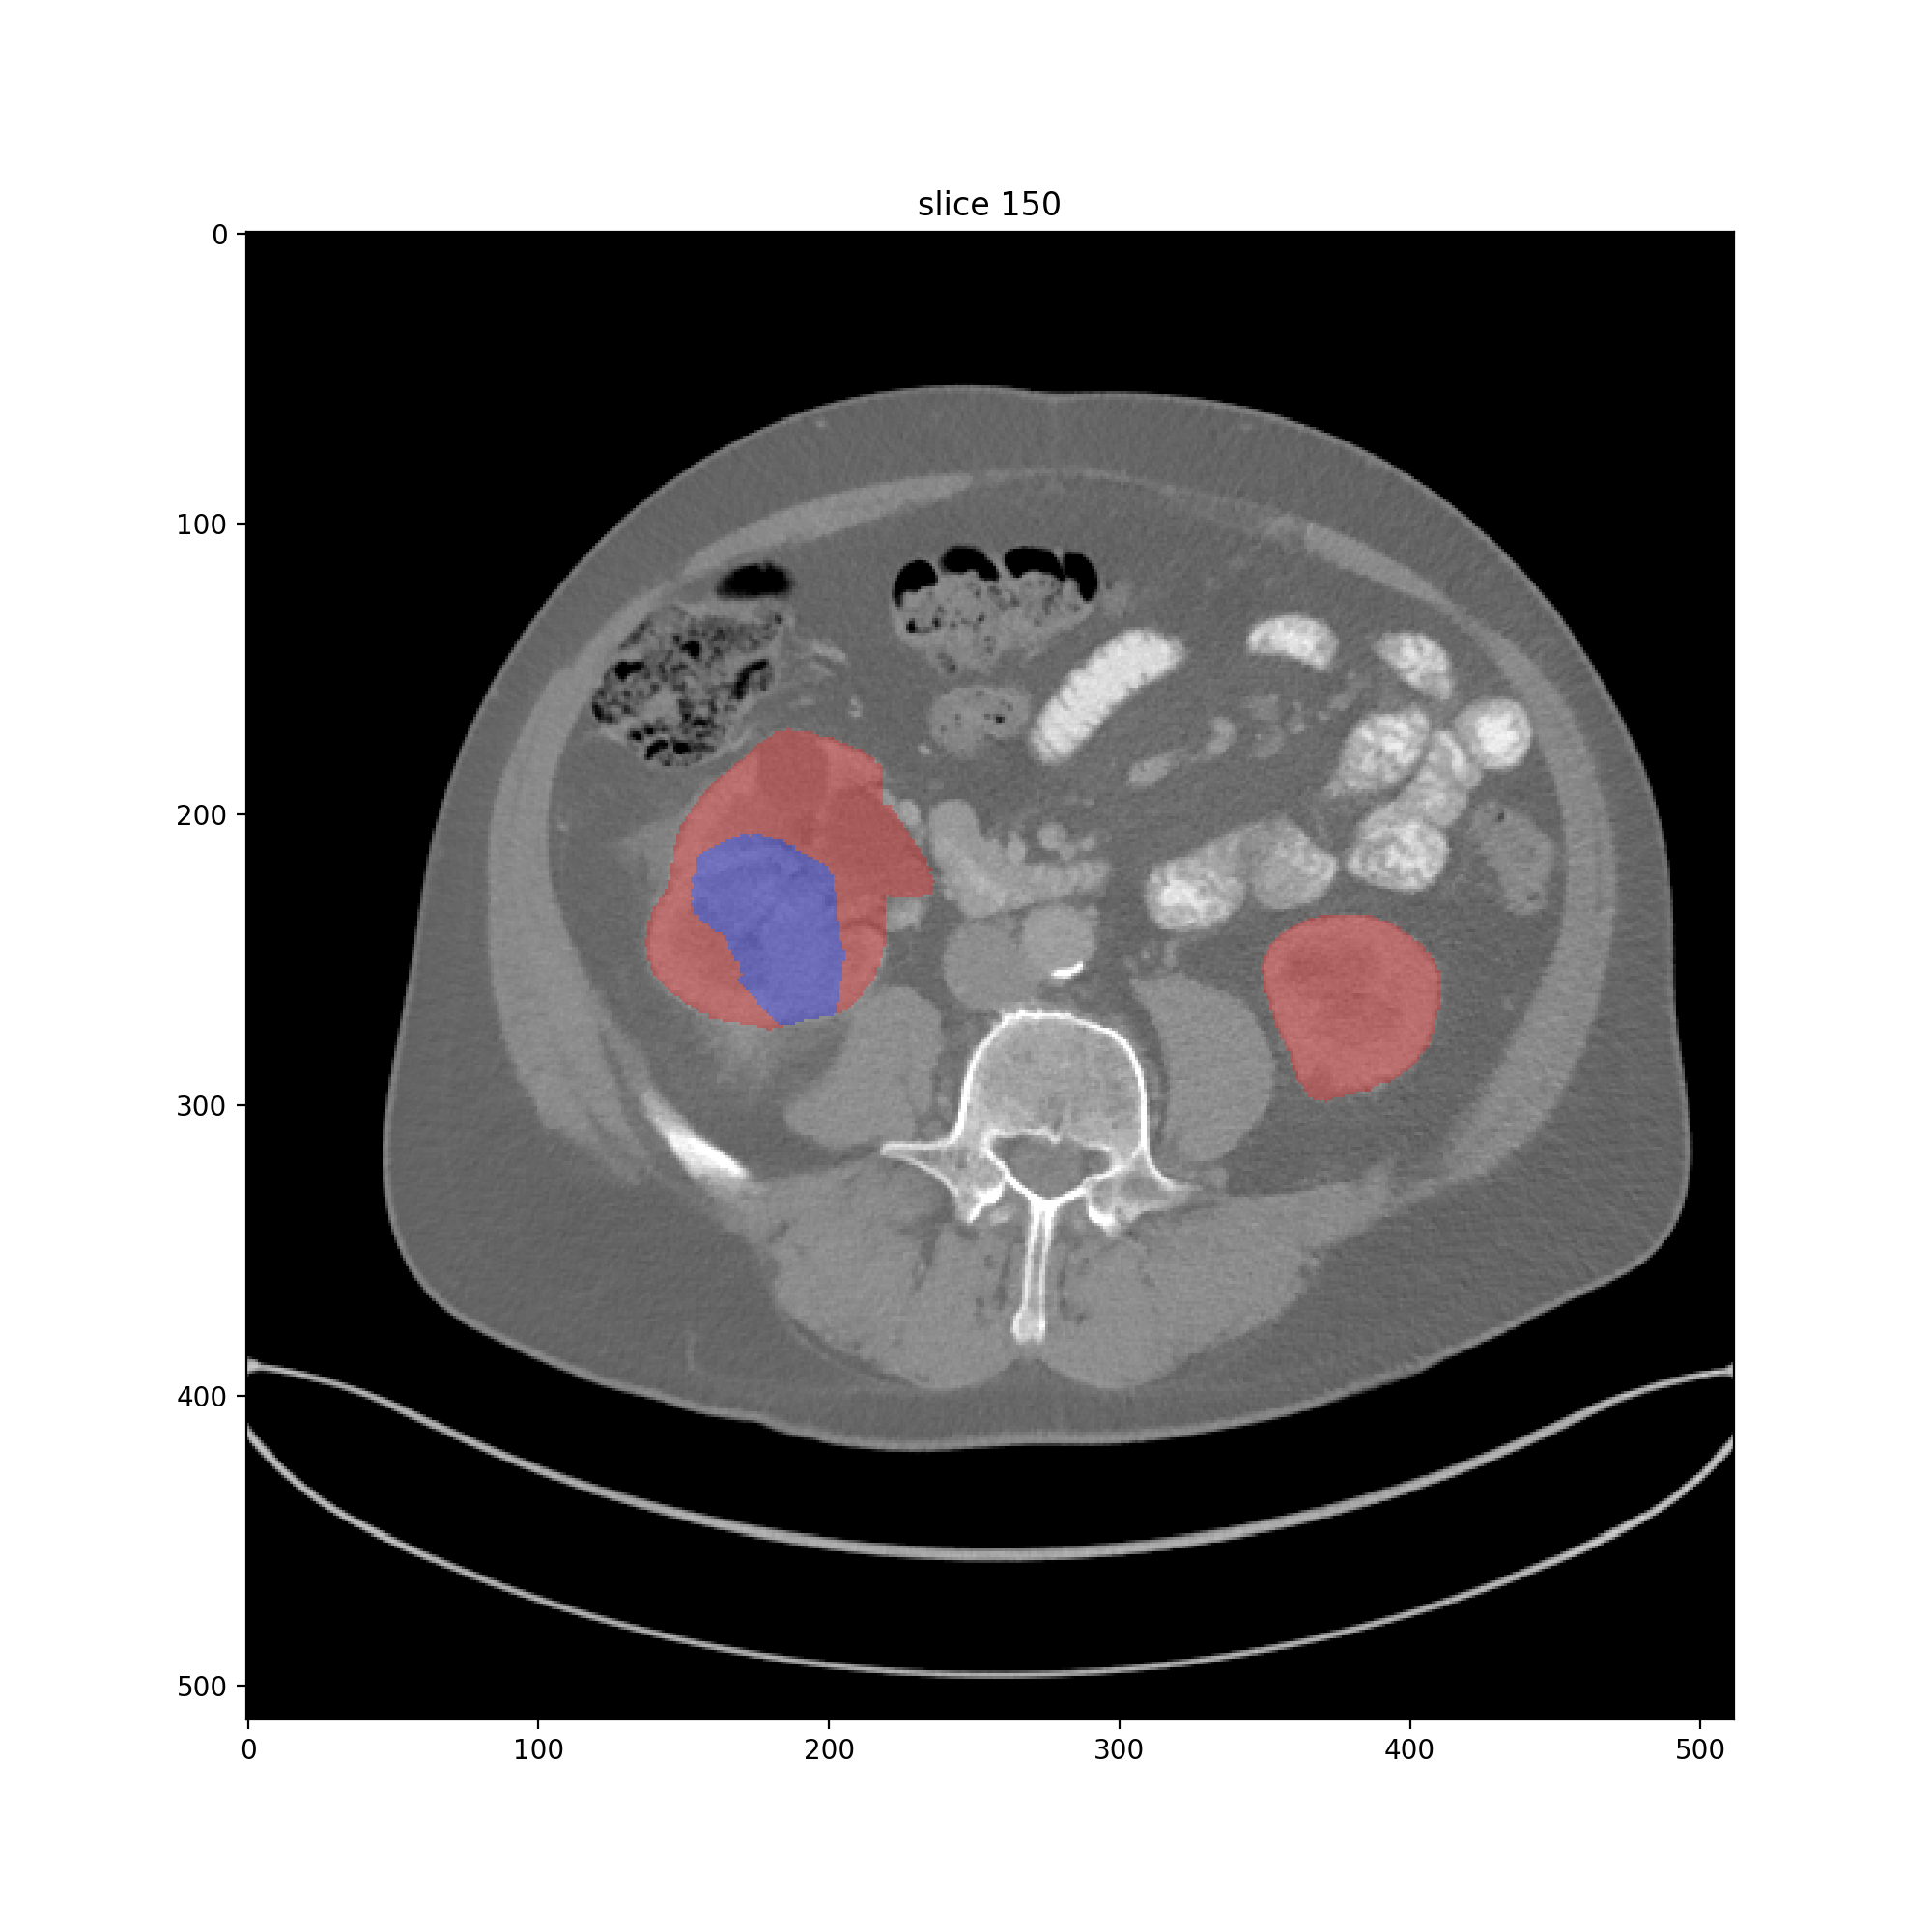

In [7]:
%matplotlib notebook
mpl.rcParams['figure.figsize'] = (10,10)
for i in tqdm_notebook(range(len(data))):
    row = data.iloc[i]
    case_nid = row['case_nid']
    tumor_volume = row['tumor_volume']
    kidney_volume = row['kidney_volume']
    if tumor_volume > kidney_volume:
        print('Case', case_nid, 'kidney size:', kidney_volume, 'tumor size:', tumor_volume)
        im, mask = starter.load_case(case_nid)
        overlayed = vis.overlayed_images(im, mask)
        multi_slice_viewer(overlayed, first_index=find_first_kidney_slice(mask))
        plt.show()
        break